In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

# Data Clustering with K Means

We're botanists who have been tirelessly collecting data on local iris flowers. We've been painstakingly measuring the sepals (little leafy parts around the bud) and petals of all the irises we could find in the wild and collecting our data in an Excel spreadsheet.

We noticed while we were in the field that the irises in some areas looked a little different from irises in other areas. Maybe these are different species!

Can we use all this data we collected to figure out if there are groups or "clusters" of irises that are more similar to each other than others?

<img 
  src="https://upload.wikimedia.org/wikipedia/commons/7/78/Petal-sepal.jpg"
  width="400">

In [9]:
iris = sns.load_dataset('iris')
iris[["sepal_length", "petal_length"]].head()

,sepal_length,petal_length
0,5.1,1.4
1,4.9,1.4
2,4.7,1.3
3,4.6,1.5
4,5.0,1.4


<Axes: xlabel='sepal_length', ylabel='petal_length'>

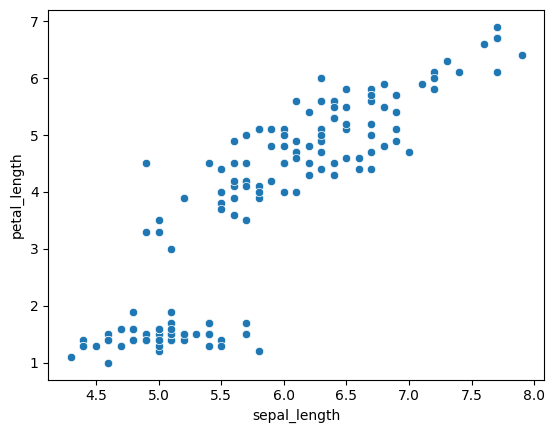

In [8]:
sns.scatterplot(iris, x='sepal_length', y="petal_length")

# K Means Clustering!

<img 
  src="https://upload.wikimedia.org/wikipedia/commons/e/ea/K-means_convergence.gif"
  height="300">

K-means is a machine learning algorithm that helps us find "clusters" in our data where the values of particular records are more similar to each other than to other records.

# How the Algorithm Works

First, we have to decide how many clusters we want to look for (this is called *k*). 

Sometimes we know ahead of time how many clusters we want to find, if not there's an art to it.

1. Randomly generate a "mean" for each cluster we want to find. These aren't technically "means" or averages yet, they're just random places to start. Each mean corresponds to a cluster.
  
2. Find the distance between each data point we have and each mean. Assign the data point to the cluster whose mean it's closest to.

3. Now that we just reassigned which clusters each data point belongs to, we recalculate the means.

4. Repeat steps 2 and 3 until the means don't change from one step to the next, or we reach a maximum number of iterations.

<img
  width = "700"
  src="https://www.learnbymarketing.com/wp-content/uploads/2015/01/method-k-means-steps-example.png">

> Image source: https://www.learnbymarketing.com/methods/k-means-clustering/

We can use a machine learning Python library called Sci-Kit Learn to run K-means.
> Note: It's exceedingly rare in data science to actually write your own algorithms. Instead, most teams rely on open source packages like Sci-Kit Learn. Though it is important to know how an underlying algorithm works!

In [24]:
X = iris[['sepal_length', 'petal_length']]

kmeans = KMeans(n_clusters=3, random_state=0, n_init="auto")
kmeans.fit(X)

KMeans(n_clusters=3, n_init='auto', random_state=0)

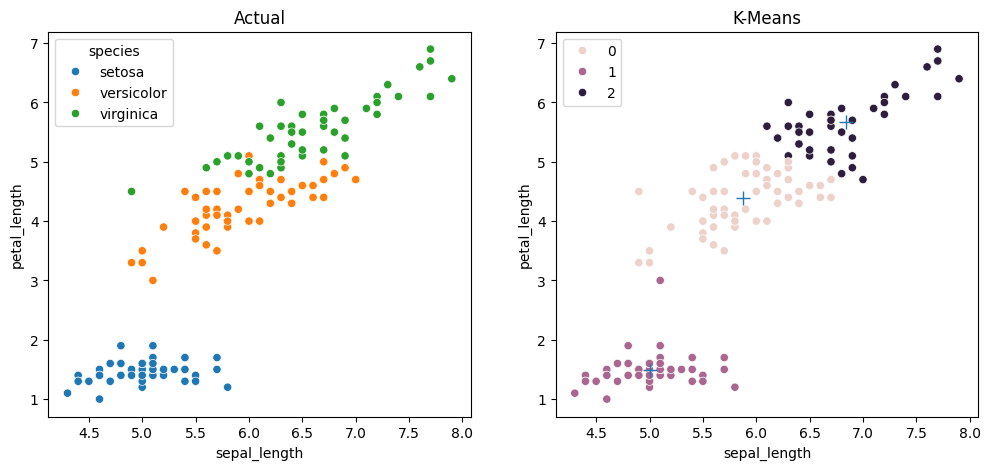

In [25]:
f, axs = plt.subplots(1, 2, figsize=(12, 5), )

plt.subplot(1, 2, 1)
plt.title("Actual")
sns.scatterplot(iris, x='sepal_length', y="petal_length", hue="species", ax=axs[0])

plt.subplot(1, 2, 2)
plt.title("K-Means")
sns.scatterplot(X, x='sepal_length', y="petal_length", hue=kmeans.labels_, ax=axs[1])
plt.plot([x for x, _ in kmeans.cluster_centers_],
         [y for _, y in kmeans.cluster_centers_],
         '+',
         markersize=10,
         )

We did pretty well! There were actually three clusters and it looks like we only got a handful of records wrong.

> Note: In the real world, if you're using K Means that means you don't already have classifications for your data. This is just to illustrate that it works.

## What else could we use this for?

- A marketing team that has budget for three targeted ad campaigns and a bunch of survey data on their customers, but doesn't know which three groups to target.

- Finding pockets of similar insurance claims.